**Deep Learning Model to predict classes**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [32]:
from keras.utils import to_categorical
from sklearn.metrics import classification_report

**Read csv**

In [2]:
b = pd.read_csv('Dry_Bean_Dataset.csv')

In [3]:
c = b

**Drop columns not required**

In [4]:
c.drop(columns=['ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4'], inplace=True)
c.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,SEKER


**Split train, validation and test data**

In [5]:
train, valid, test = np.split(c.sample(frac=1), [int(0.6*len(c)), int(0.8*len(c))])

C:\Users\weroc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


**Balance oversampling issue**

In [6]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [7]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [23]:
# Convert y_train to one-hot encoded format
y_train_encoded = to_categorical(y_train, num_classes=7)

# Now y_train_encoded should have the shape (14833, 7)
print("y_train_encoded shape:", y_train_encoded.shape)

y_train_encoded shape: (14833, 7)


**Neural Network**

**Define Model**

In [24]:
def training_model(X_train, y_train, number_of_nodes):
    print("X_train shape:", X_train.shape)
    print("y_train shape:", y_train.shape)
    neural_network = tf.keras.Sequential([
        tf.keras.layers.Dense(number_of_nodes, activation='relu', input_shape=(12,)),
        tf.keras.layers.Dense(number_of_nodes, activation='relu'),
        tf.keras.layers.Dense(7, activation='softmax')
    ])
    neural_network.compile(optimizer = tf.keras.optimizers.Adam(0.05), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    model_details = neural_network.fit(X_train, y_train, epochs=50, batch_size = 64, validation_split=0.2, verbose=0)
    return neural_network, model_details

**Define Plots**

In [25]:
def plot_model_details(model_details):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
  ax1.plot(model_details.history['loss'], label='loss')
  ax1.plot(model_details.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Sparse Categorical crossentropy')
  ax1.grid(True)

  ax2.plot(model_details.history['accuracy'], label='accuracy')
  ax2.plot(model_details.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  plt.show()

**Define Function to find the best model**

16 nodes
X_train shape: (14833, 12)
y_train shape: (14833,)


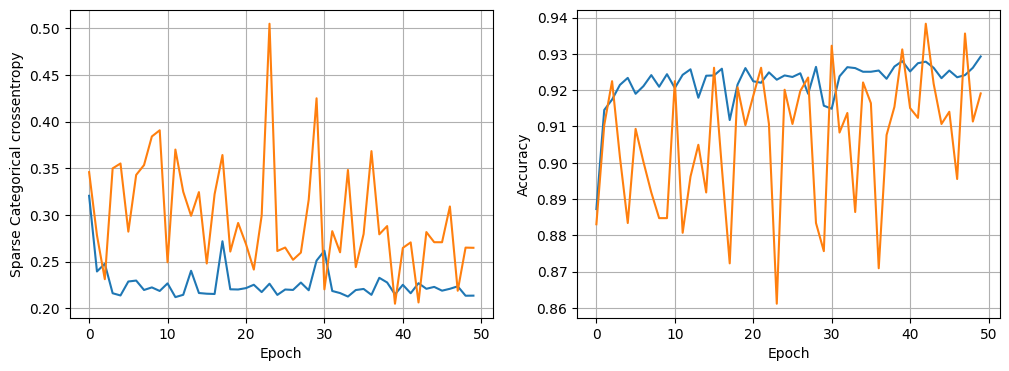

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.9076 - loss: 0.2825
32 nodes
X_train shape: (14833, 12)
y_train shape: (14833,)


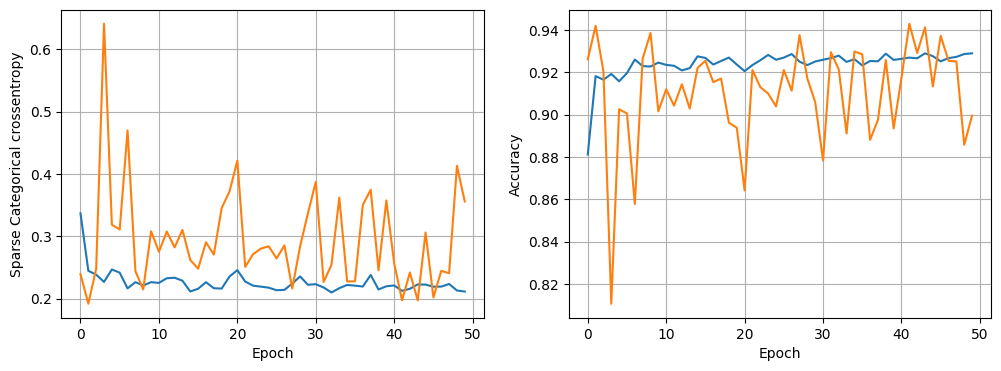

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.9056 - loss: 0.3091
64 nodes
X_train shape: (14833, 12)
y_train shape: (14833,)


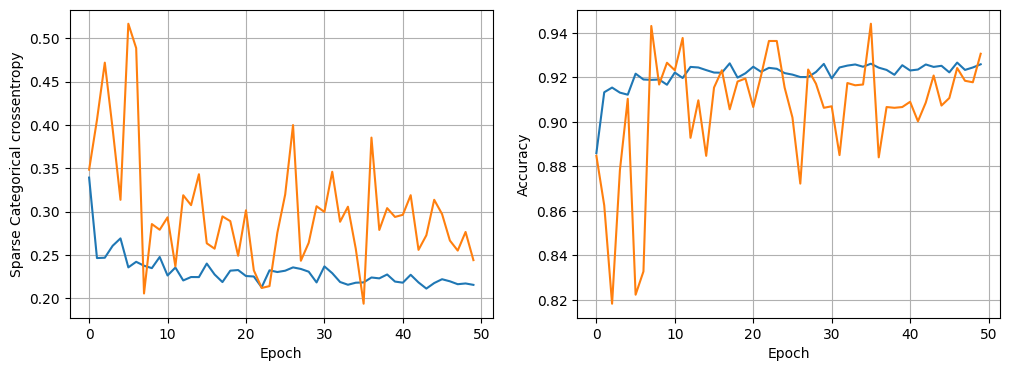

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.9197 - loss: 0.2573


In [26]:
lowest_value_loss = float('inf')
best_model = None
for number_of_nodes in [16, 32, 64]:
    print(f"{number_of_nodes} nodes")
    neural_network, model_details = training_model(X_train, y_train, number_of_nodes)
    plot_model_details(model_details)
    value_loss = neural_network.evaluate(X_valid, y_valid)[0]
    if value_loss < lowest_value_loss:
        lowest_value_loss = value_loss
        best_model = neural_network

**Best Model Summary**

In [40]:
best_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,343 (63.84 KB)

 Trainable params: 5,447 (21.28 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,896 (42.57 KB)

**Get Probablity distribution of predicted classes**

In [36]:
y_pred = best_model.predict(X_test)
print(y_pred[:10])  # Print the first 10 elements of y_pred

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step
(2723, 7)


**Get predicted classes (max of probablity distribution)**

In [50]:
predicted_classes = np.argmax(y_pred, axis=1)

**Classification Report**

In [53]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       263
           1       1.00      1.00      1.00        92
           2       0.89      0.94      0.91       324
           3       0.92      0.91      0.91       742
           4       0.96      0.95      0.95       383
           5       0.92      0.95      0.94       399
           6       0.87      0.84      0.86       520

    accuracy                           0.91      2723
   macro avg       0.92      0.92      0.92      2723
weighted avg       0.91      0.91      0.91      2723



**Thank You**